## My work


In [2]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

#path of the config file and pretrained model weight
protoFile = "./hand/pose_deploy.prototxt"
weightsFile = "./hand/pose_iter_102000.caffemodel"
#number of points to detect on the hand
nPoints = 22
POSE_PAIRS = [ [0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20] ]
# loading the model from opencv inbuilt-model
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [162]:
hand_image = "./images/sis_hand3.jpeg"
frame = cv2.imread(hand_image)
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
aspect_ratio = frameWidth/frameHeight
threshold = 0.1

# input image dimensions for the network
inHeight = 368
# inWidth = 368
inWidth = int(((aspect_ratio*inHeight)*8)//8)
#preprocessing the image
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)
net.setInput(inpBlob)
#output results
output = net.forward()

time taken by network : 1.741


Total time taken : 3.807


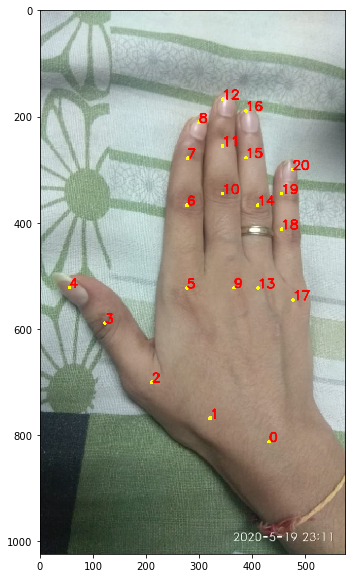

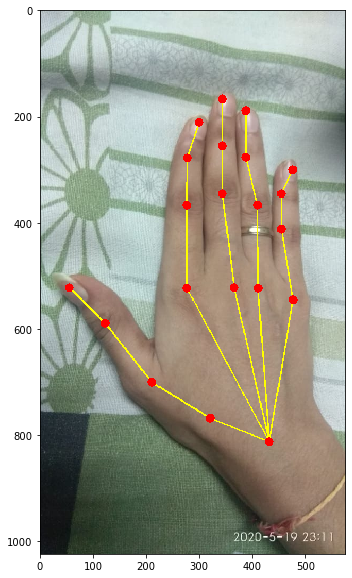

In [163]:
# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    if prob > threshold :
        cv2.circle(frameCopy, (int(point[0]), int(point[1])), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(point[0]), int(point[1])))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2)
        cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


cv2.imwrite('./images/Output-Keypoints.jpg', frameCopy)
cv2.imwrite('./images/Output-Skeleton.jpg', frame)

In [ ]:
#Applied basic mathematical operation on the point to get the final co-ordinates for the placement of the ring 
#after selecting the appropriate point
p13 = points[13]
p14 = points[14]
p9 = points[9]

print(p13,p14,p9)
m0 = (p13[0]+p14[0])/2
m1 = (p13[1]+p14[1])/2
mid_point = (int(m0),int(m1))

distance = np.sqrt(( (p13[0]-p9[0])**2 + (p13[1]-p9[1])**2 ))

distance = int(distance)

print("mid_point : ",mid_point)
print("distance : ",int(distance))

line_point_1_x = int(np.sqrt((mid_point[0] - distance/2)**2))
line_point_1_y = int(np.sqrt((mid_point[1] )**2))

line_point_2_x = int(np.sqrt((mid_point[0] + distance/2)**2))
line_point_2_y = int(np.sqrt((mid_point[1] )**2))


line_point_1 = (line_point_1_x,line_point_1_y)

line_point_2 = (line_point_2_x,line_point_2_y)

print(line_point_1,line_point_2)

In [168]:
#select the point which will be used to place the ring
point1=points[14]
point2=points[13]

print(point1,point2)

x1=point1[0]- int(distance)
x2=point2[0]+ int(distance)
y1=int(point1[1])
y2=int(point2[1])

nringwidth = 2*distance

nringheight=nringwidth*ring.shape[1]/ring.shape[0]
nringheight,nringwidth=int(nringheight),int(nringwidth)

(409, 367) (410, 523)


(350, 350, 4)
(156, 91, 4)


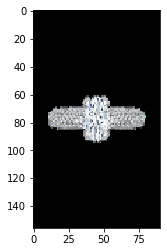

In [169]:





"""
load the image and then create its mask after resizing it.

"""
ring=cv2.imread("./images/bestring.png",-1)
print(ring.shape)


ring=cv2.resize(ring,(x2-x1,y2-y1))
b,g,r,a=cv2.split(ring)
print(ring.shape)
ring=cv2.merge((r,g,b))
plt.imshow(ring)
omask=cv2.merge((a,a,a))
omask_inv=cv2.bitwise_not(omask)




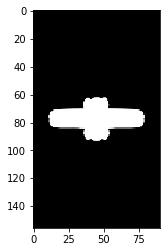

In [170]:
plt.imshow(omask)


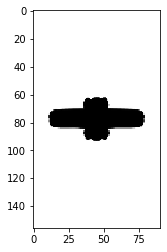

In [171]:
plt.imshow(omask_inv)

(156, 91, 3)


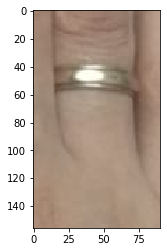

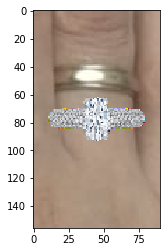

In [173]:
#creating an overlay on the original image
roi_bg=cv2.bitwise_and(roi,omask_inv)
roi_fg=cv2.bitwise_and(ring,omask)
dst = cv2.add(roi_bg,roi_fg)
plt.imshow(dst)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

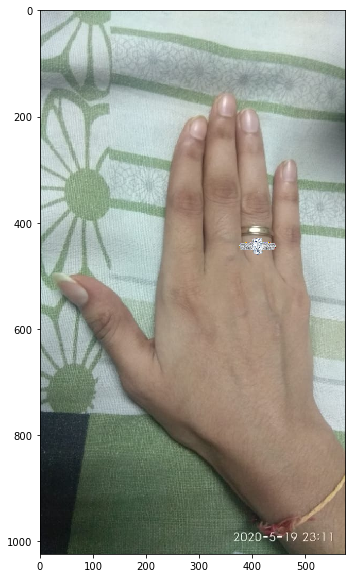

In [174]:

frame2[y1:y2,x1:x2]=dst
plt.figure(111,figsize=(10,10))
plt.imshow(frame2)